In [90]:
#importing all necessary modules 

import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

import re, string
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [91]:
# adding the training urls

train_url = 'https://drive.google.com/file/d/1F1fDHnvDMEopHYaulMQYNy1SCpEenoFr/view?usp=sharing'
train_url_ = 'https://drive.google.com/uc?id=' + train_url.split('/')[-2]

In [92]:
# adding the testing urls

test_url = 'https://drive.google.com/file/d/1Jg3l_AmdkfEIIiLAuwlwyybpXYt93Vvp/view?usp=sharing'
test_url_ = 'https://drive.google.com/uc?id=' + test_url.split('/')[-2]

In [93]:
print('my training link:', train_url_)
print('my testing link:', test_url_)

my training link: https://drive.google.com/uc?id=1F1fDHnvDMEopHYaulMQYNy1SCpEenoFr
my testing link: https://drive.google.com/uc?id=1Jg3l_AmdkfEIIiLAuwlwyybpXYt93Vvp


In [94]:
# reading the files

df_train = pd.read_csv(train_url_, header= None) # got the dataframe
df_test = pd.read_csv(test_url_, header= None)

print(df_train)
print(list(df_train[0]))

# print(df_train[0][1])

               0                                                  1
0     __label__0  study interventions are recombinant CD40-ligan...
1     __label__0  study interventions are Liposomal doxorubicin ...
2     __label__0  study interventions are BI 836909 . multiple m...
3     __label__0  study interventions are Immunoglobulins . recu...
4     __label__0  study interventions are Paclitaxel . stage ova...
...          ...                                                ...
9902  __label__1  study interventions are Pazopanib . carcinoma ...
9903  __label__1  study interventions are Dexamethasone 21-phosp...
9904  __label__1  study interventions are Camptothecin . rectal ...
9905  __label__1  study interventions are Cyclophosphamide . sta...
9906  __label__1  study interventions are Cyclophosphamide . lym...

[9907 rows x 2 columns]
['__label__0', '__label__0', '__label__0', '__label__0', '__label__0', '__label__0', '__label__0', '__label__0', '__label__0', '__label__0', '__label__0', '__l

In [95]:
# the second column is responsible fot the text we need (so we take df_train[1])

train_data_set = df_train[1]
test_data_set = df_test[1]

print(type(train_data_set), train_data_set[:5])

<class 'pandas.core.series.Series'> 0    study interventions are recombinant CD40-ligan...
1    study interventions are Liposomal doxorubicin ...
2    study interventions are BI 836909 . multiple m...
3    study interventions are Immunoglobulins . recu...
4    study interventions are Paclitaxel . stage ova...
Name: 1, dtype: object


In [96]:
# working with labels or with the first column in order to the program to distinguish labels

train_label = []
test_label = []

for label in list(df_train[0]):
    if label == '__label__0':
        train_label.append(0)
    if label == '__label__1':
        train_label.append(1)

for label_test in list(df_test[0]):
    if label_test == '__label__0':
        test_label.append(0)
    if label_test == '__label__1':
        test_label.append(1)

print(type(train_label), len(train_label))
print(type(test_label))

y_train = np.asarray(train_label).astype("float32")
y_test = np.asarray(test_label).astype("float32")

print(type(y_train), y_train)

<class 'list'> 9907
<class 'list'>
<class 'numpy.ndarray'> [0. 0. 0. ... 1. 1. 1.]


In [97]:
stop_words = stopwords.words("english")

#cleaning the text from punctuation and other things

def cleaning(data):
    
    filtered = re.sub("@\S+", " ", data)  # remove mentions
    filtered = re.sub("https*\S+", " ", filtered) # remove urls
    filtered = re.sub("#\S+", " ", filtered) # remove hashtags
    filtered = re.sub("\d", " ", filtered) # remove all numbers
    filtered = re.sub('[%s]' % re.escape(string.punctuation), ' ', filtered)  # remove punctuation
    filtered = re.sub('\n', ' ', filtered) # remove new lines       
    filtered = re.sub('\s{2,}',' ', filtered) # remove extra spaces
    
    filtered = filtered.lower()
    
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    return text

cleaned_train = train_data_set.apply(clean_text)
cleaned_test = test_data_set.apply(clean_text)

print('For example we received the clean train text: ','\n', type(cleaned_train),'\n', cleaned_train[:5])

For example we received the clean train text:  
 <class 'pandas.core.series.Series'> 
 0    study interventions recombinant cd ligand mela...
1    study interventions liposomal doxorubicin colo...
2    study interventions bi multiple myeloma diagno...
3    study interventions immunoglobulins recurrent ...
4    study interventions paclitaxel stage ovarian c...
Name: 1, dtype: object


In [98]:
# train and test data concatenation (type -- string)

train_in_string = ''
for i in cleaned_train:
    train_in_string += (' ' + i)
    
test_in_string = ''
for j in cleaned_test:
    test_in_string += (' ' + j)
    
all_data = train_in_string + test_in_string

In [99]:
# Tokenization
tokenization = word_tokenize(all_data)

#Lemmatization 
lemmatizer = WordNetLemmatizer()
lemmatized_all_data = [lemmatizer.lemmatize(t) for t in tokenization]

dictionary = list(set(lemmatized_all_data))

def lemmatization(data):

    data = data.lower()
    tokens = word_tokenize(data)
    lemmatized = [lemmatizer.lemmatize(l) for l in tokens]
    res = [dictionary.index(i) for i in lemmatized]
    return res


x_train_data = cleaned_train.apply(lemmatization)
x_test_data = cleaned_test.apply(lemmatization)

print('x_train_data type:', type(x_train_data))
print('x_test_data type:', type(x_test_data))


x_train_data type: <class 'pandas.core.series.Series'>
x_test_data type: <class 'pandas.core.series.Series'>


In [100]:
# this performs kind of vectorization 

# generate zeros, iterates over all sequences and indexes in seq
# iterates oves nested seq and assignes 1 to i-seq om j-position 

def embadding(sequences, dimension=10000):
  
    results = np.zeros((len(sequences), dimension))
    # print('seq', sequences)
    for i, sequence in enumerate(sequences):
        # print(i)
        # print(sequence )
        for j in sequence:
           #  print(j)
            results[i, j] = 1.
    return results

In [101]:
# applying the function 

train_vect = embadding(x_train_data)
test_vect = embadding(x_test_data)


print(type(train_vect), len(train_vect))
print(type(test_vect), len(test_vect))# great!

<class 'numpy.ndarray'> 9907
<class 'numpy.ndarray'> 26


In [102]:
# creating the first model ever :)

the_first_model = tf.keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [103]:
the_first_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# checking all data
print(type(train_vect), len(train_vect))
print(type(y_train), len(y_train))


<class 'numpy.ndarray'> 9907
<class 'numpy.ndarray'> 9907


In [104]:
history = the_first_model.fit(train_vect,y_train,
                    epochs=50,
                    batch_size=512,
                    validation_split=0.2, shuffle = True,
                    verbose = 2)


Epoch 1/50
16/16 - 1s - loss: 0.6799 - accuracy: 0.6071 - val_loss: 0.7717 - val_accuracy: 0.0050 - 609ms/epoch - 38ms/step
Epoch 2/50
16/16 - 0s - loss: 0.6438 - accuracy: 0.6207 - val_loss: 0.8057 - val_accuracy: 0.0807 - 136ms/epoch - 9ms/step
Epoch 3/50
16/16 - 0s - loss: 0.6009 - accuracy: 0.6690 - val_loss: 0.8209 - val_accuracy: 0.2235 - 135ms/epoch - 8ms/step
Epoch 4/50
16/16 - 0s - loss: 0.5547 - accuracy: 0.7392 - val_loss: 0.7791 - val_accuracy: 0.4279 - 139ms/epoch - 9ms/step
Epoch 5/50
16/16 - 0s - loss: 0.5062 - accuracy: 0.7931 - val_loss: 0.7267 - val_accuracy: 0.5429 - 140ms/epoch - 9ms/step
Epoch 6/50
16/16 - 0s - loss: 0.4606 - accuracy: 0.8245 - val_loss: 0.6983 - val_accuracy: 0.5964 - 141ms/epoch - 9ms/step
Epoch 7/50
16/16 - 0s - loss: 0.4208 - accuracy: 0.8434 - val_loss: 0.6567 - val_accuracy: 0.6408 - 144ms/epoch - 9ms/step
Epoch 8/50
16/16 - 0s - loss: 0.3867 - accuracy: 0.8601 - val_loss: 0.6299 - val_accuracy: 0.6700 - 145ms/epoch - 9ms/step
Epoch 9/50
16/1

In [105]:
print(the_first_model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 8)                 80008     
                                                                 
 dense_10 (Dense)            (None, 16)                144       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 80,169
Trainable params: 80,169
Non-trainable params: 0
_________________________________________________________________
None


In [106]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

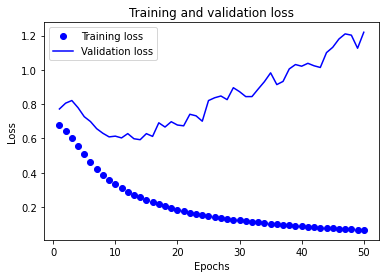

In [107]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [108]:
# results 
score = the_first_model.evaluate(test_vect, y_test, verbose=2) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

1/1 - 0s - loss: 0.3194 - accuracy: 0.8846 - 13ms/epoch - 13ms/step
Test score: 0.3194146156311035
Test accuracy: 0.8846153616905212
